In this project I will be utilyzing python to explore and analyze crowdsourced parental leave data from 1,601 companies across different industries, including paid/unpaid maternity and paternity leave weeks.

RECOMMENDED ANALYSIS:

1. Which companies offer the most paid parental leave weeks?
2. Is maternity leave typically longer than paternity leave?
3. What is the distribution of parental leave weeks offered?
4. Are there noticable differences between industries?

###### *(Source: Fairygodboss)*

To begin this project, I need to import the necessary libraries and set the proper options for analysis.

###### **Importing libraries and setting options** 

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
style.use("ggplot") 
import seaborn as sns 
sns.set_style("darkgrid") 
import os 

###### **Utilizing os to search, change, and list directories to find necessary files**

I need to find out what directory my files are located in.

In [3]:
os.getcwd()

'c:\\Users\\mjaso\\OneDrive'

I need to change my directory to my downloads folder.

In [4]:
os.chdir('c:\\Users\\mjaso\\Downloads')

Now I will check the files in this folder.

In [5]:
os.listdir('c:\\Users\\mjaso\\Downloads\\Parental+Leave')

['data_dictionary.csv', 'parental_leave.csv', '__MACOSX']

I see the csv's that I will be using for this project, I will now read themm into a pandas dataframe and attach a variable to them.

In [6]:
parental_leave = pd.read_csv(r"c:\\Users\\mjaso\\Downloads\\Parental+Leave\\parental_leave.csv", encoding="latin1") 
parental_leave_dict = pd.read_csv(r"c:\\Users\\mjaso\\Downloads\\Parental+Leave\\data_dictionary.csv", encoding="latin1") 

DATA EXAMINATION:

Now I will view the first and last 5 rows of the dataframe to ensure the data has been imported correctly and to check for data consistency.

###### **Viewing the first 5 rows of data**

In [7]:
parental_leave.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,NaN,NaN,NaN,NaN
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,NaN,NaN,NaN,NaN
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN


###### **Viewing the last 5 rows of data**

In [8]:
parental_leave.tail()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1600,Merrimac Industrial Sales,Wholesale,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data for the most part appears to be consistent throughout, with the exception of four columns named "Unnamed". However, I will address that issue when I begin the data cleaning process.

Now I will check this dataframe for any duplicate rows.

###### **Checking for any duplicate rows of data**

In [9]:
duplicate_rows = parental_leave.duplicated().sum()
print(f"There are {duplicate_rows} duplicated rows of data in this dataframe.") 

There are 0 duplicated rows of data in this dataframe.


Now I will check to see how many null values are in each column.

###### **Checking the count of null values per column**

In [10]:
for na in parental_leave.columns:
    na_val = parental_leave[na].isna().sum()
    print(f"The column {na} has {na_val} null values.") 

The column Company has 0 null values.
The column Industry has 3 null values.
The column Paid Maternity Leave has 0 null values.
The column Unpaid Maternity Leave has 107 null values.
The column Paid Paternity Leave has 1312 null values.
The column Unpaid Paternity Leave has 1537 null values.
The column Unnamed: 6 has 1601 null values.
The column Unnamed: 7 has 1601 null values.
The column Unnamed: 8 has 1601 null values.
The column Unnamed: 9 has 1601 null values.


I will also check to see the number of unique values that each column has.

###### **Checking the count of unique values per column**

In [11]:
for u in parental_leave.columns:
    u_val = parental_leave[u].nunique()
    print(f"There are {u_val} unique values in the column {u}.") 

There are 1600 unique values in the column Company.
There are 185 unique values in the column Industry.
There are 59 unique values in the column Paid Maternity Leave.
There are 54 unique values in the column Unpaid Maternity Leave.
There are 28 unique values in the column Paid Paternity Leave.
There are 14 unique values in the column Unpaid Paternity Leave.
There are 0 unique values in the column Unnamed: 6.
There are 0 unique values in the column Unnamed: 7.
There are 0 unique values in the column Unnamed: 8.
There are 0 unique values in the column Unnamed: 9.


Now I will examine the statistical information related to the numerical and categorical columns.

###### **Viewing the statistical info in each numerical column**

In [12]:
parental_leave.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,1601.000000,1494.000000,289.000000,64.000000,0.0,0.0,0.0,0.0
mean,10.909119,6.628849,7.332180,7.734375,NaN,NaN,NaN,NaN
std,8.024514,9.274953,6.817591,6.831863,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
50%,11.000000,4.000000,6.000000,6.000000,NaN,NaN,NaN,NaN
75%,12.000000,10.000000,12.000000,12.000000,NaN,NaN,NaN,NaN
max,52.000000,52.000000,51.000000,29.000000,NaN,NaN,NaN,NaN


###### **Viewing the statistical info in each categorical column**

In [13]:
parental_leave.describe(include="object") 

,Company,Industry
count,1601,1598
unique,1600,185
top,Collins Aerospace,Technology: Software
freq,2,160


The information above provided some insight into the dataframe, which helps to undestand the data a little better. I will now check the datatypes of each column to ensure they are in the correct format.

###### **Checking the dtypes of each column**

In [14]:
parental_leave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 125.2+ KB


The dtypes are in a sufficient format, now I will move on to the data cleaning process.

DATA CLEANING:

I will first start the data cleaning by deleting the unnecessary columns from the dataframe.

###### **Removing columns from the dataframe**

In [15]:
del parental_leave["Unnamed: 6"]
del parental_leave["Unnamed: 7"]
del parental_leave["Unnamed: 8"]
del parental_leave["Unnamed: 9"]

I will verify that those columns have been removed from the dataframe.

###### **Verifying changes**

In [16]:
parental_leave.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0


I will now calculate two additional columns named "Total Maternity Leave" and "Total Paternity Leave" that will hold the values of paid and unpaid leave time for each company.

###### **Creating new calculated columns**

In [17]:
parental_leave["Total Maternity Leave"] = parental_leave["Paid Maternity Leave"] + parental_leave["Unpaid Maternity Leave"]
parental_leave["Total Paternity Leave"] = parental_leave["Paid Paternity Leave"] + parental_leave["Unpaid Paternity Leave"]

I will now verify that both calculated columns have been added to the dataframe.

###### **Verifying new columns**

In [18]:
parental_leave.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Total Maternity Leave,Total Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,12.0,12.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,9.0,8.5
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,14.0,12.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,16.0,20.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,12.0,0.0


In [19]:
parental_leave.tail()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Total Maternity Leave,Total Paternity Leave
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN,NaN,NaN
1600,Merrimac Industrial Sales,Wholesale,0.0,NaN,NaN,NaN,NaN,NaN


Many of the values in this dataframe have null values. For this project I will replace all of the null values in the numerical columns with 0's. 

###### **Filling NaN values**

In [20]:
for f in ["Paid Maternity Leave", "Unpaid Maternity Leave",
          "Paid Paternity Leave", "Unpaid Paternity Leave",
          "Total Maternity Leave", "Total Paternity Leave"]:
    parental_leave[f].fillna(0, inplace=True)

###### **Verifying NaN values in columns were filled**

In [21]:
parental_leave.tail()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Total Maternity Leave,Total Paternity Leave
1596,Xero,Technology: Software,6.0,0.0,0.0,0.0,0.0,0.0
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,0.0,0.0,0.0,0.0,0.0
1598,Schneider National,Transportation: Freight & Logistics,0.0,0.0,0.0,0.0,0.0,0.0
1599,HD Supply,Wholesale,14.0,0.0,0.0,0.0,0.0,0.0
1600,Merrimac Industrial Sales,Wholesale,0.0,0.0,0.0,0.0,0.0,0.0


Lastly, I will change the dtypes of the numerical columns from float to int to get rid of the decimal points.

###### **Converting float to int dtypes**

In [22]:
parental_leave["Paid Maternity Leave"] = parental_leave["Paid Maternity Leave"].astype(int)
parental_leave["Unpaid Maternity Leave"] = parental_leave["Unpaid Maternity Leave"].astype(int)
parental_leave["Paid Paternity Leave"] = parental_leave["Paid Paternity Leave"].astype(int)
parental_leave["Unpaid Paternity Leave"] = parental_leave["Unpaid Paternity Leave"].astype(int)
parental_leave["Total Maternity Leave"] = parental_leave["Total Maternity Leave"].astype(int)
parental_leave["Total Paternity Leave"] = parental_leave["Total Paternity Leave"].astype(int)

###### **Verifying changes**

In [23]:
parental_leave.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Total Maternity Leave,Total Paternity Leave
0,Epsilon,Advertising,6,6,6,6,12,12
1,The Walt Disney Company,Arts & Entertainment,5,4,4,4,9,8
2,Guild Education,Business Services: Other,14,0,8,4,14,12
3,WeWork,Business Services: Other,14,2,16,4,16,20
4,Randstad USA,Business Services: Staffing & Outsourcing,5,7,0,0,12,0


Now that the data in this dataframe has been examined and cleaned, I will now move on to answering the questions associated with this project.

RECOMMENDED ANALYSIS:

1. Which companies offer the most paid parental leave weeks?

###### **Top 25 most paid maternity weeks by company**

In [24]:
most_paid_maternity_weeks = parental_leave.groupby("Company")["Paid Maternity Leave"].sum().sort_values(ascending=False).reset_index()
top_25_most_paid_maternity_weeks = most_paid_maternity_weeks[:25]
top_25_most_paid_maternity_weeks

,Company,Paid Maternity Leave
0,Bitdefender,52
1,Spokane County,52
2,"Reliance Industries, Ltd",52
3,World Vision,52
4,Veritas Law,52
5,Cloudworkers,52
6,University of British Columbia,52
7,LeverX,52
8,Dynatrace,52
9,JHC Systems,52


###### **Top 25 most paid paternity weeks by company**

In [25]:
most_paid_paternity_weeks = parental_leave.groupby("Company")["Paid Paternity Leave"].sum().sort_values(ascending=False).reset_index()
top_25_most_paid_paternity_weeks = most_paid_paternity_weeks[:25]
top_25_most_paid_paternity_weeks

,Company,Paid Paternity Leave
0,Grant Thornton,51
1,LAC-Group,35
2,Flatiron Health,30
3,Salesforce,26
4,Hewlett Packard Enterprise,26
5,Bill and Melinda Gates Foundation,26
6,Dropbox,24
7,Start Early,24
8,S&P Global,23
9,Bain & Company,21


2. Is maternity leave typically longer than paternity leave?

###### **Avg weeks of total maternity and paternity leave**

In [26]:
avg_total_maternity_leave = round(parental_leave["Total Maternity Leave"].mean(), 1)
avg_total_paternity_leave = round(parental_leave["Total Paternity Leave"].mean(), 1)
print(f"""Maternity leave is typically longer than paternity leave. The average time for total maternity leave (paid and unpaid) is {avg_total_maternity_leave} weeks. 
While the average time for total paternity leave is {avg_total_paternity_leave} weeks.""")

Maternity leave is typically longer than paternity leave. The average time for total maternity leave (paid and unpaid) is 16.4 weeks. 
While the average time for total paternity leave is 0.4 weeks.


###### **Max weeks of total maternity vs paternity leave**

In [27]:
max_total_maternity_leave = round(parental_leave["Total Maternity Leave"].max(), 2)
max_total_paternity_leave = round(parental_leave["Total Paternity Leave"].max(), 2)
print(f"The maximum  amount of total maternity leave is {max_total_maternity_leave} weeks, while the maximum amount of total_paternity_leave is {max_total_paternity_leave} weeks.") 

The maximum  amount of total maternity leave is 104 weeks, while the maximum amount of total_paternity_leave is 48 weeks.


3. What is the distribution of parental leave weeks offered?

###### **Distribution of paid weeks of maternity leave vs paternity leave**

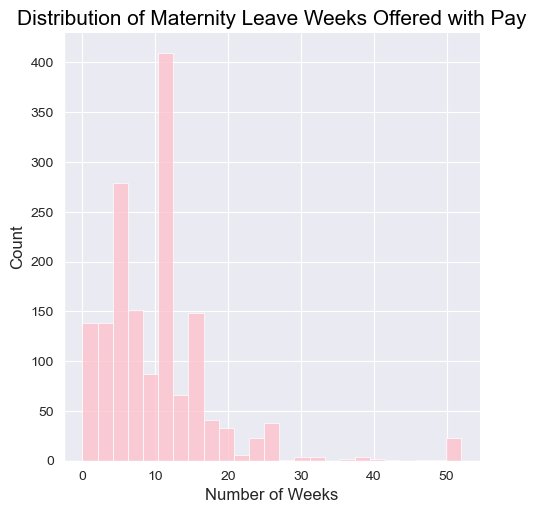

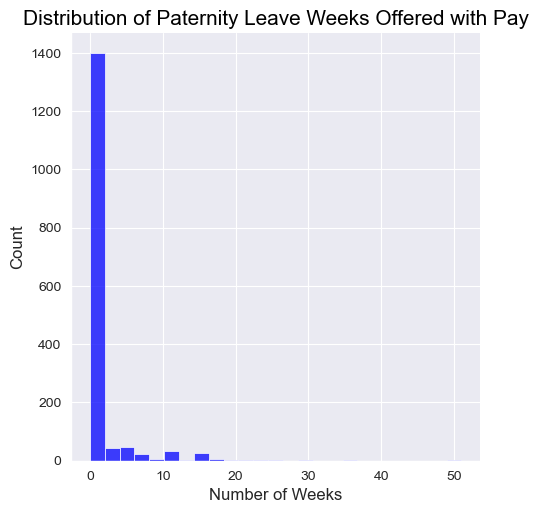

In [28]:
paid_maternity_leave = parental_leave.groupby("Company")["Paid Maternity Leave"].sum().reset_index()
total_maternity_leave = parental_leave.groupby("Company")["Total Maternity Leave"].sum().reset_index()
paid_paternity_leave = parental_leave.groupby("Company")["Paid Paternity Leave"].sum().reset_index()
total_paternity_leave = parental_leave.groupby("Company")["Total Paternity Leave"].sum().reset_index()

sns.displot(paid_maternity_leave["Paid Maternity Leave"], kde=False, bins=25, color="pink")
plt.title("Distribution of Maternity Leave Weeks Offered with Pay",
          color="black",
          fontsize=15)
plt.xlabel("Number of Weeks")
sns.displot(paid_paternity_leave["Paid Paternity Leave"], kde=False, bins=25, color="blue")
plt.title("Distribution of Paternity Leave Weeks Offered with Pay",
          color="black",
          fontsize=15)
plt.xlabel("Number of Weeks") 
print()

###### **Distribution of total weeks of maternity leave vs paternity leave**

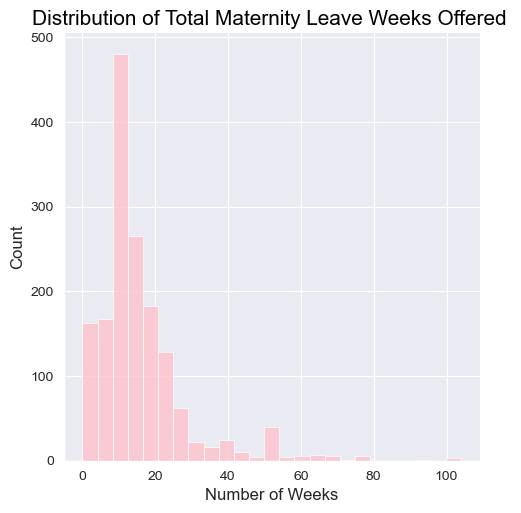

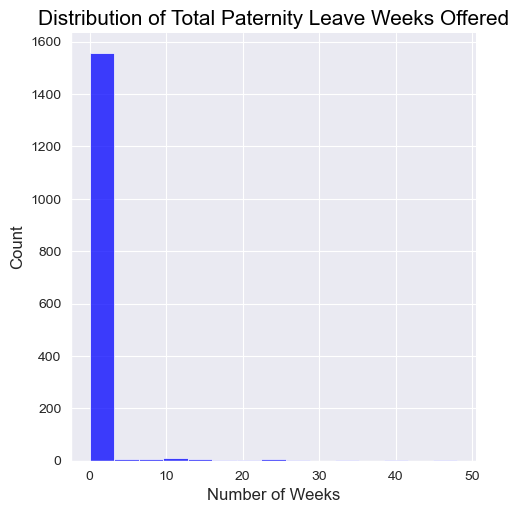

In [29]:
sns.displot(total_maternity_leave["Total Maternity Leave"], kde=False, bins=25, color="pink")
plt.title("Distribution of Total Maternity Leave Weeks Offered ",
          color="black",
          fontsize=15)
plt.xlabel("Number of Weeks")
sns.displot(total_paternity_leave["Total Paternity Leave"], kde=False, bins=15, color="blue")
plt.title("Distribution of Total Paternity Leave Weeks Offered",
          color="black",
          fontsize=15)
plt.xlabel("Number of Weeks") 
print()

4. Are there noticable differences between industries?

###### **Weeks of paid maternity leave by industry**

In [30]:
paid_maternity_leave_by_industry = parental_leave.groupby("Industry")["Paid Maternity Leave"].sum().sort_values(ascending=False).reset_index()
paid_maternity_leave_by_industry

,Industry,Paid Maternity Leave
0,Technology: Software,2025
1,Technology: Consumer Internet,985
2,Finance: Diversified,646
3,Consulting Services,565
4,Information Services: Technology,539
5,Educational Services: College & Universities,475
6,Advertising,470
7,Technology: B2B Tech Services,412
8,Law Firm,381
9,Technology: Manufacturing,366


###### **Bar graph of top 50 industries with the most paid weeks of maternity leave**

The 'Technology: Software' industry offers the most paid weeks of maternity leave.


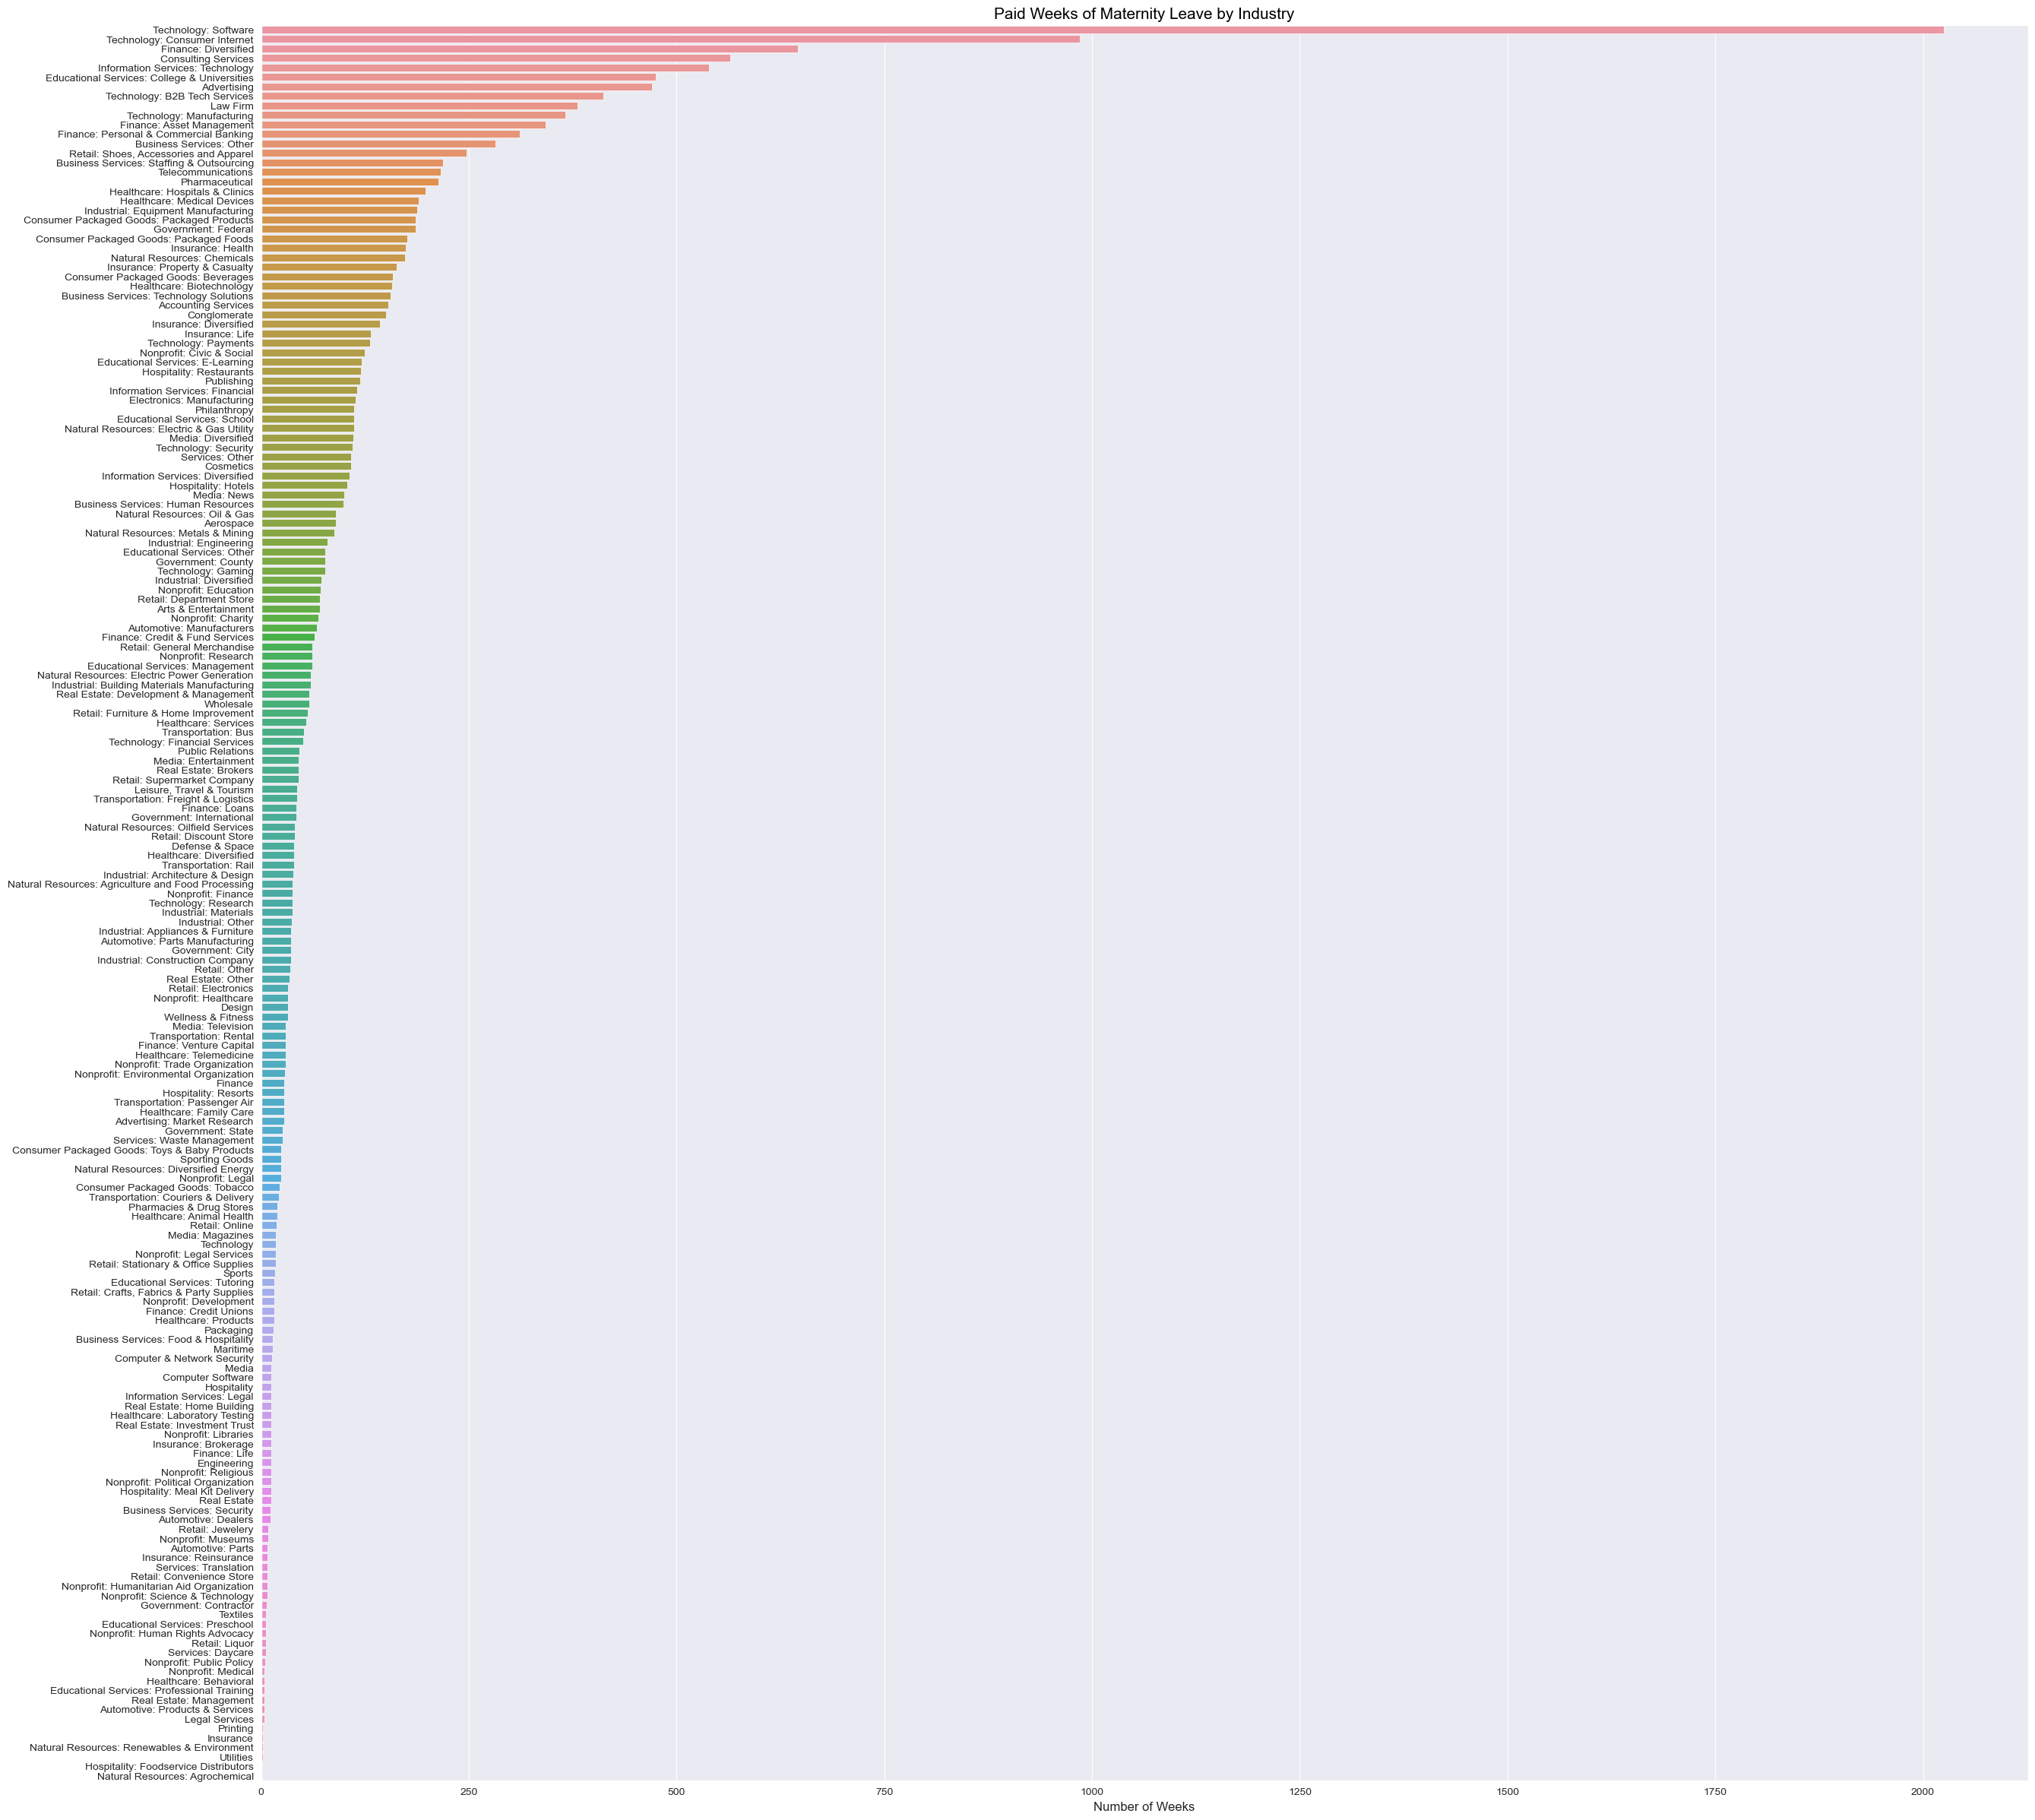

In [31]:
plt.figure(figsize=(30, 30))
sns.barplot(data=paid_maternity_leave_by_industry[:50], 
            x=paid_maternity_leave_by_industry["Paid Maternity Leave"],
            y=paid_maternity_leave_by_industry["Industry"])
plt.title("Paid Weeks of Maternity Leave by Industry",
          color="black",
          fontsize=15)
plt.ylabel("")
plt.xlabel("Number of Weeks") 
print("The 'Technology: Software' industry offers the most paid weeks of maternity leave.")

###### **Weeks of paid paternity leave by industry**

In [32]:
paid_paternity_leave_by_industry = parental_leave.groupby("Industry")["Paid Paternity Leave"].sum().sort_values(ascending=False).reset_index()
paid_paternity_leave_by_industry

,Industry,Paid Paternity Leave
0,Technology: Consumer Internet,251
1,Technology: Software,231
2,Finance: Diversified,154
3,Consulting Services,83
4,Technology: B2B Tech Services,79
5,Accounting Services,67
6,Technology: Manufacturing,52
7,Finance: Asset Management,51
8,Telecommunications,44
9,Technology: Gaming,41


###### **Bar graph of top 50 industries with the most paid weeks of paternity leave**

The 'Technology: Consumer Internet' industry offers the most paid weeks of paternity leave.


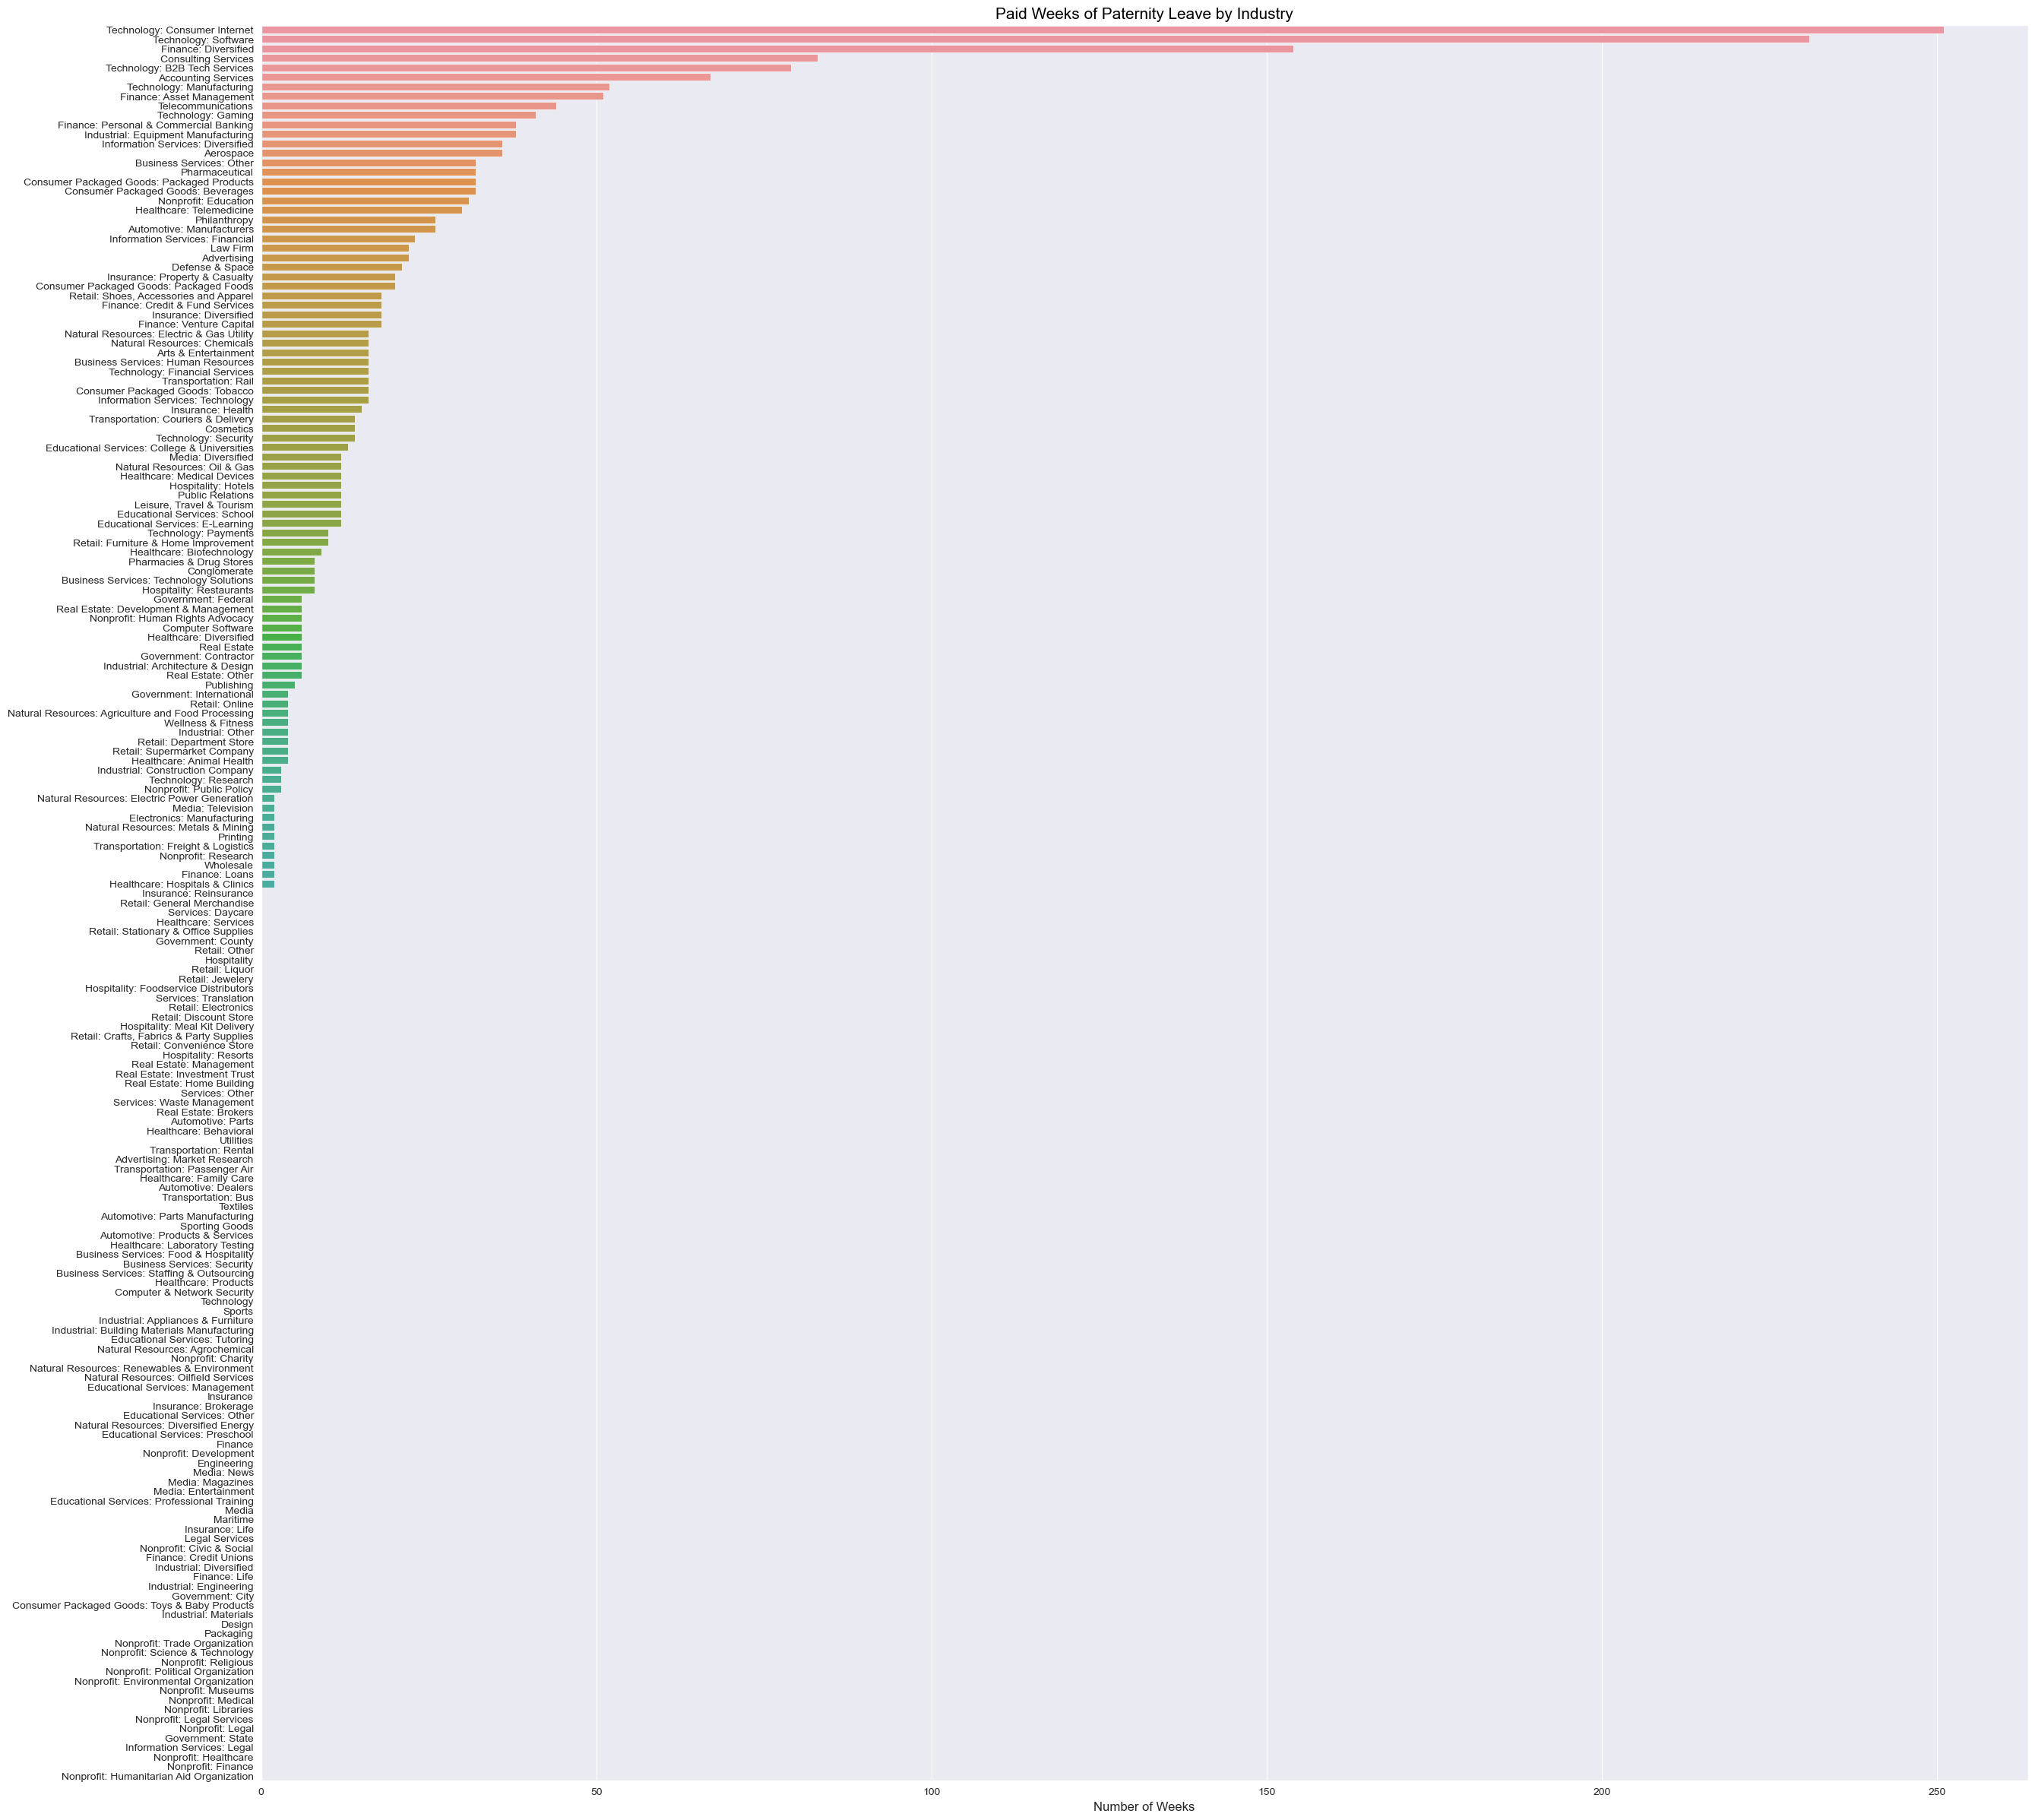

In [33]:
plt.figure(figsize=(30, 30))
sns.barplot(data=paid_paternity_leave_by_industry[:50], 
            x=paid_paternity_leave_by_industry["Paid Paternity Leave"],
            y=paid_paternity_leave_by_industry["Industry"])
plt.title("Paid Weeks of Paternity Leave by Industry",
          color="black",
          fontsize=15)
plt.ylabel("")
plt.xlabel("Number of Weeks") 
print("The 'Technology: Consumer Internet' industry offers the most paid weeks of paternity leave.")

###### **Weeks of total maternity leave by industry**

In [34]:
total_maternity_leave_by_industry = parental_leave.groupby("Industry")["Total Maternity Leave"].sum().sort_values(ascending=False).reset_index()
total_maternity_leave_by_industry

,Industry,Total Maternity Leave
0,Technology: Software,2906
1,Technology: Consumer Internet,1137
2,Consulting Services,984
3,Educational Services: College & Universities,858
4,Finance: Diversified,739
5,Information Services: Technology,732
6,Advertising,724
7,Technology: B2B Tech Services,626
8,Law Firm,568
9,Finance: Personal & Commercial Banking,542


###### **Bar graph of top 50 industries with the most total weeks of maternity leave**

The 'Technology: Software' industry offers the most total weeks of maternity leave.


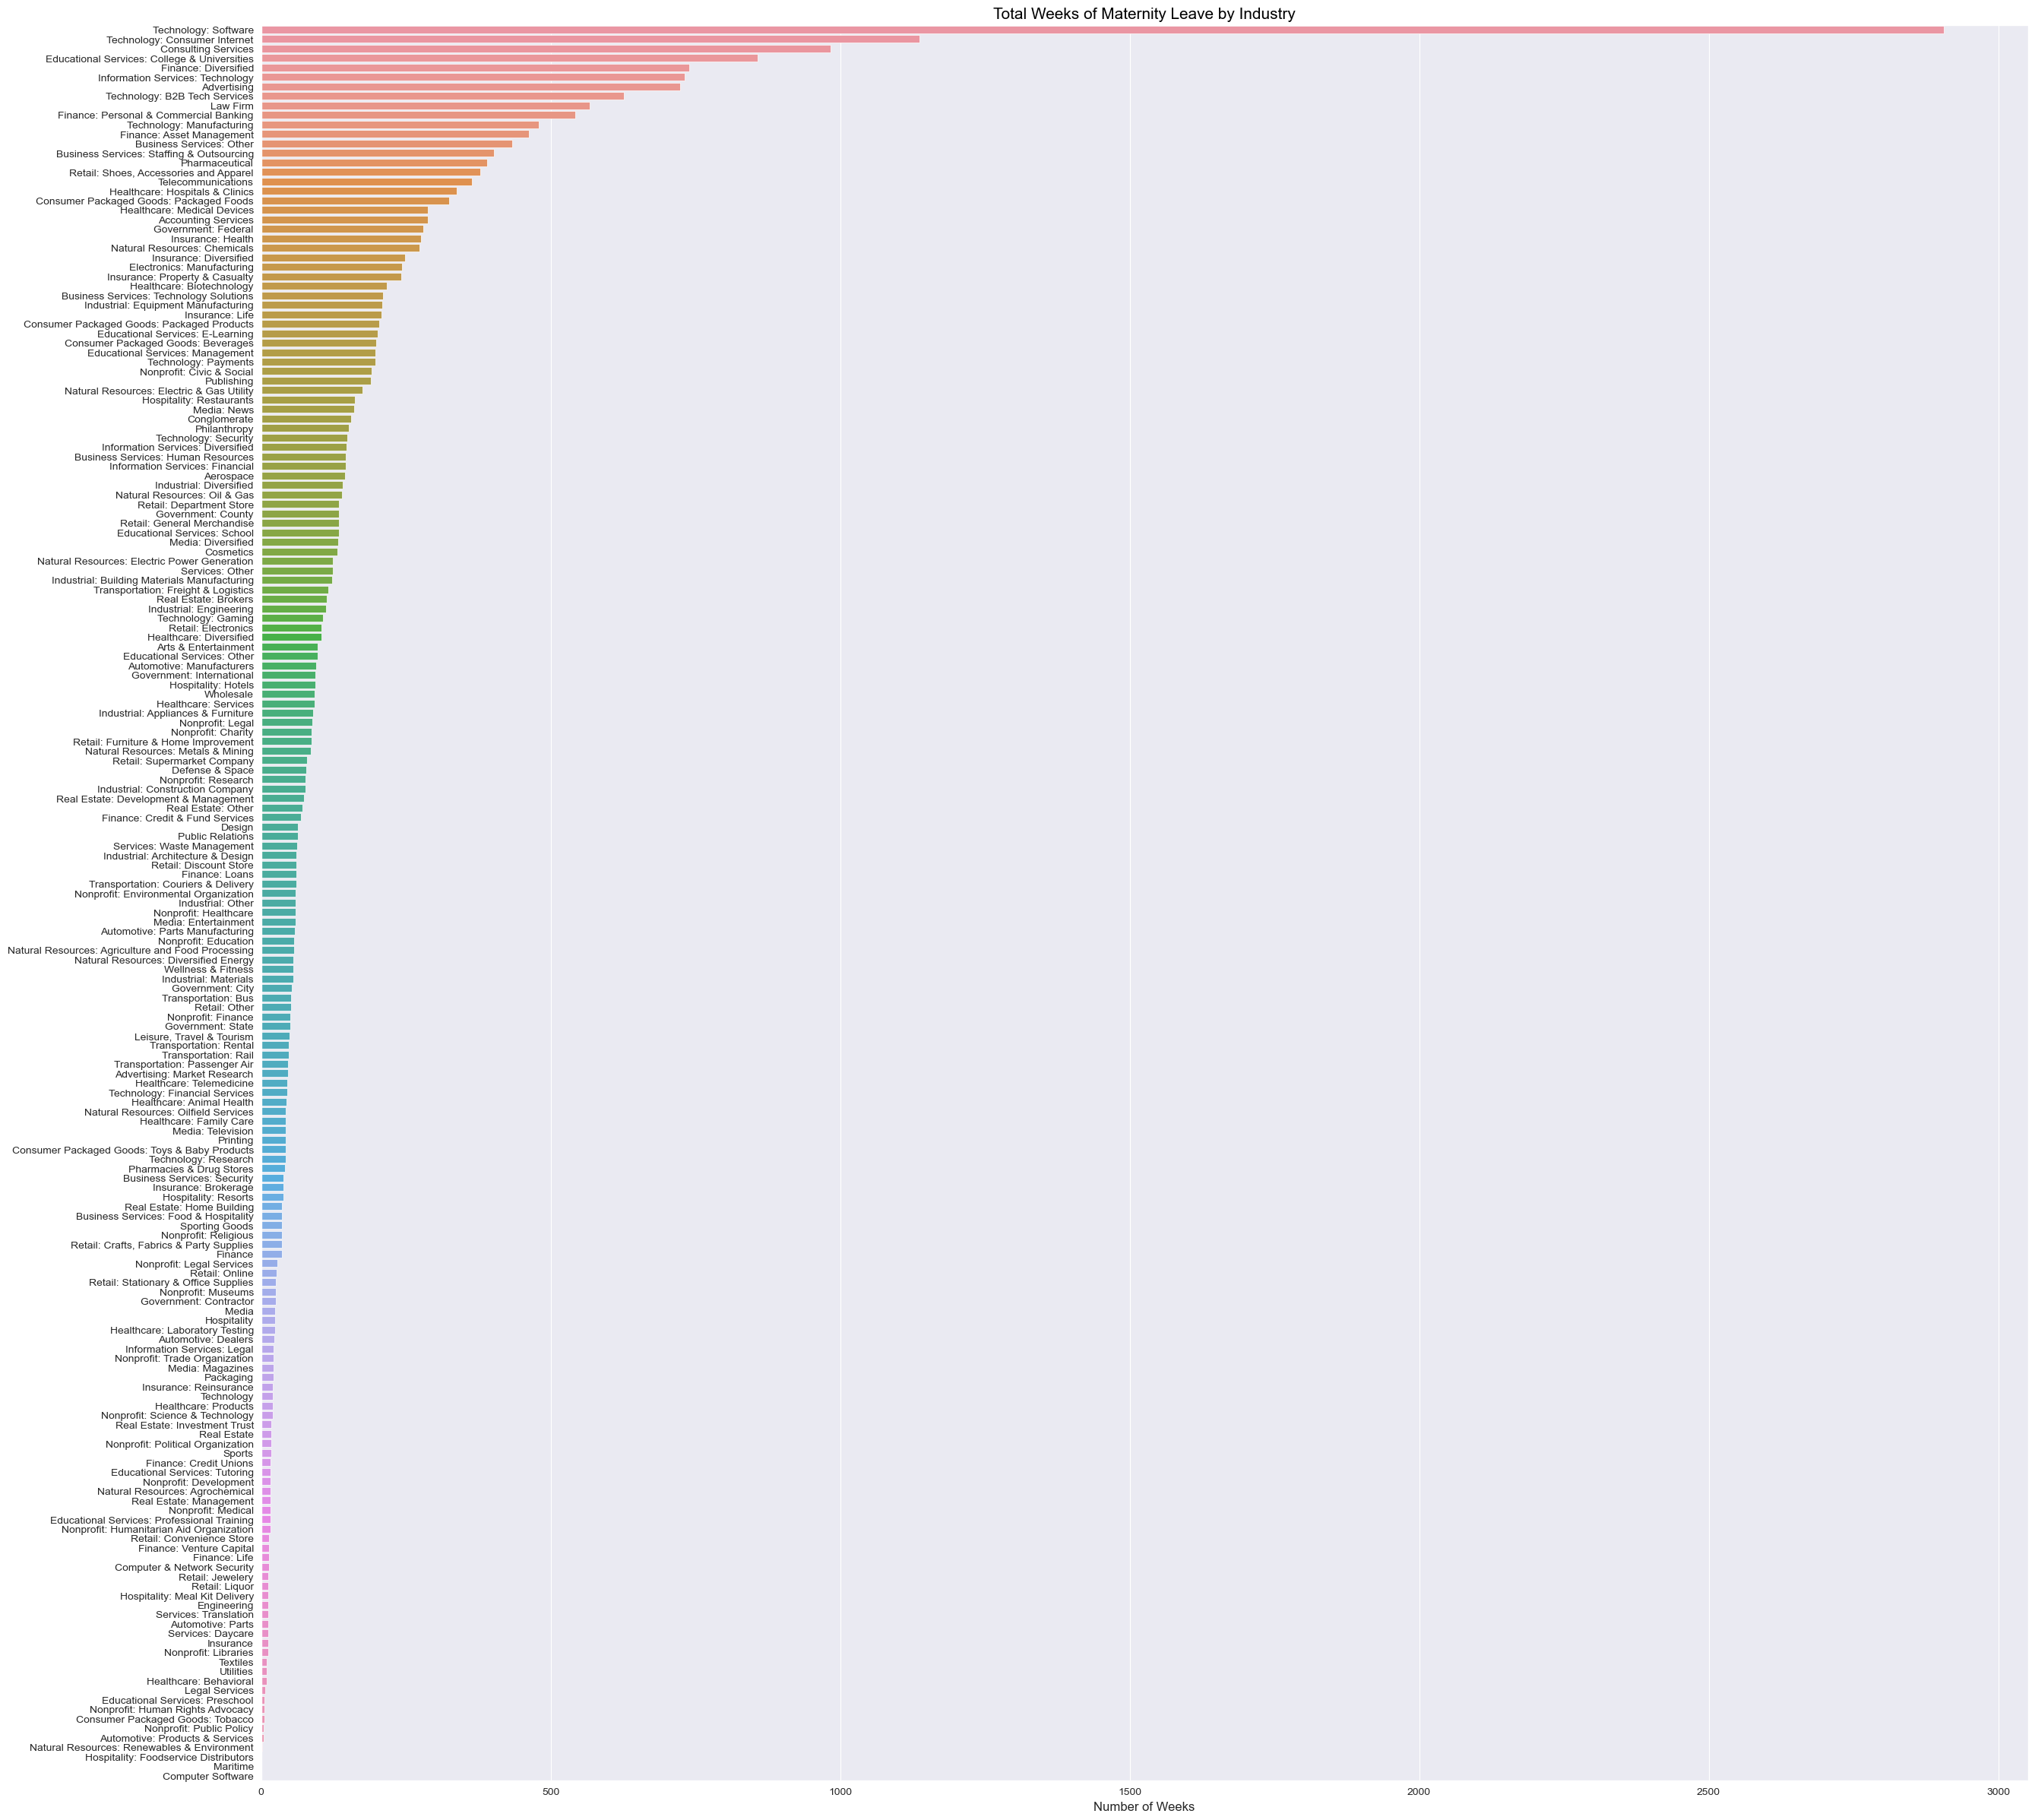

In [35]:
plt.figure(figsize=(30, 30))
sns.barplot(data=total_maternity_leave_by_industry[:50], 
            x=total_maternity_leave_by_industry["Total Maternity Leave"],
            y=total_maternity_leave_by_industry["Industry"])
plt.title("Total Weeks of Maternity Leave by Industry",
          color="black",
          fontsize=15)
plt.ylabel("")
plt.xlabel("Number of Weeks") 
print("The 'Technology: Software' industry offers the most total weeks of maternity leave.")

###### **Weeks of total paternity leave by industry**

In [36]:
total_paternity_leave_by_industry = parental_leave.groupby("Industry")["Total Paternity Leave"].sum().sort_values(ascending=False).reset_index()
total_paternity_leave_by_industry

,Industry,Total Paternity Leave
0,Technology: Consumer Internet,112
1,Technology: Software,110
2,Consulting Services,39
3,Business Services: Other,32
4,Pharmacies & Drug Stores,32
5,Defense & Space,30
6,Finance: Asset Management,29
7,Technology: B2B Tech Services,29
8,Pharmaceutical,24
9,Technology: Gaming,23


###### **Bar graph of top 50 industries with the most total weeks of maternity leave**

The 'Technology: Consumer Internet' industry offers the most total weeks of paternity leave, followed closely by the 'Technology: Software' industry.


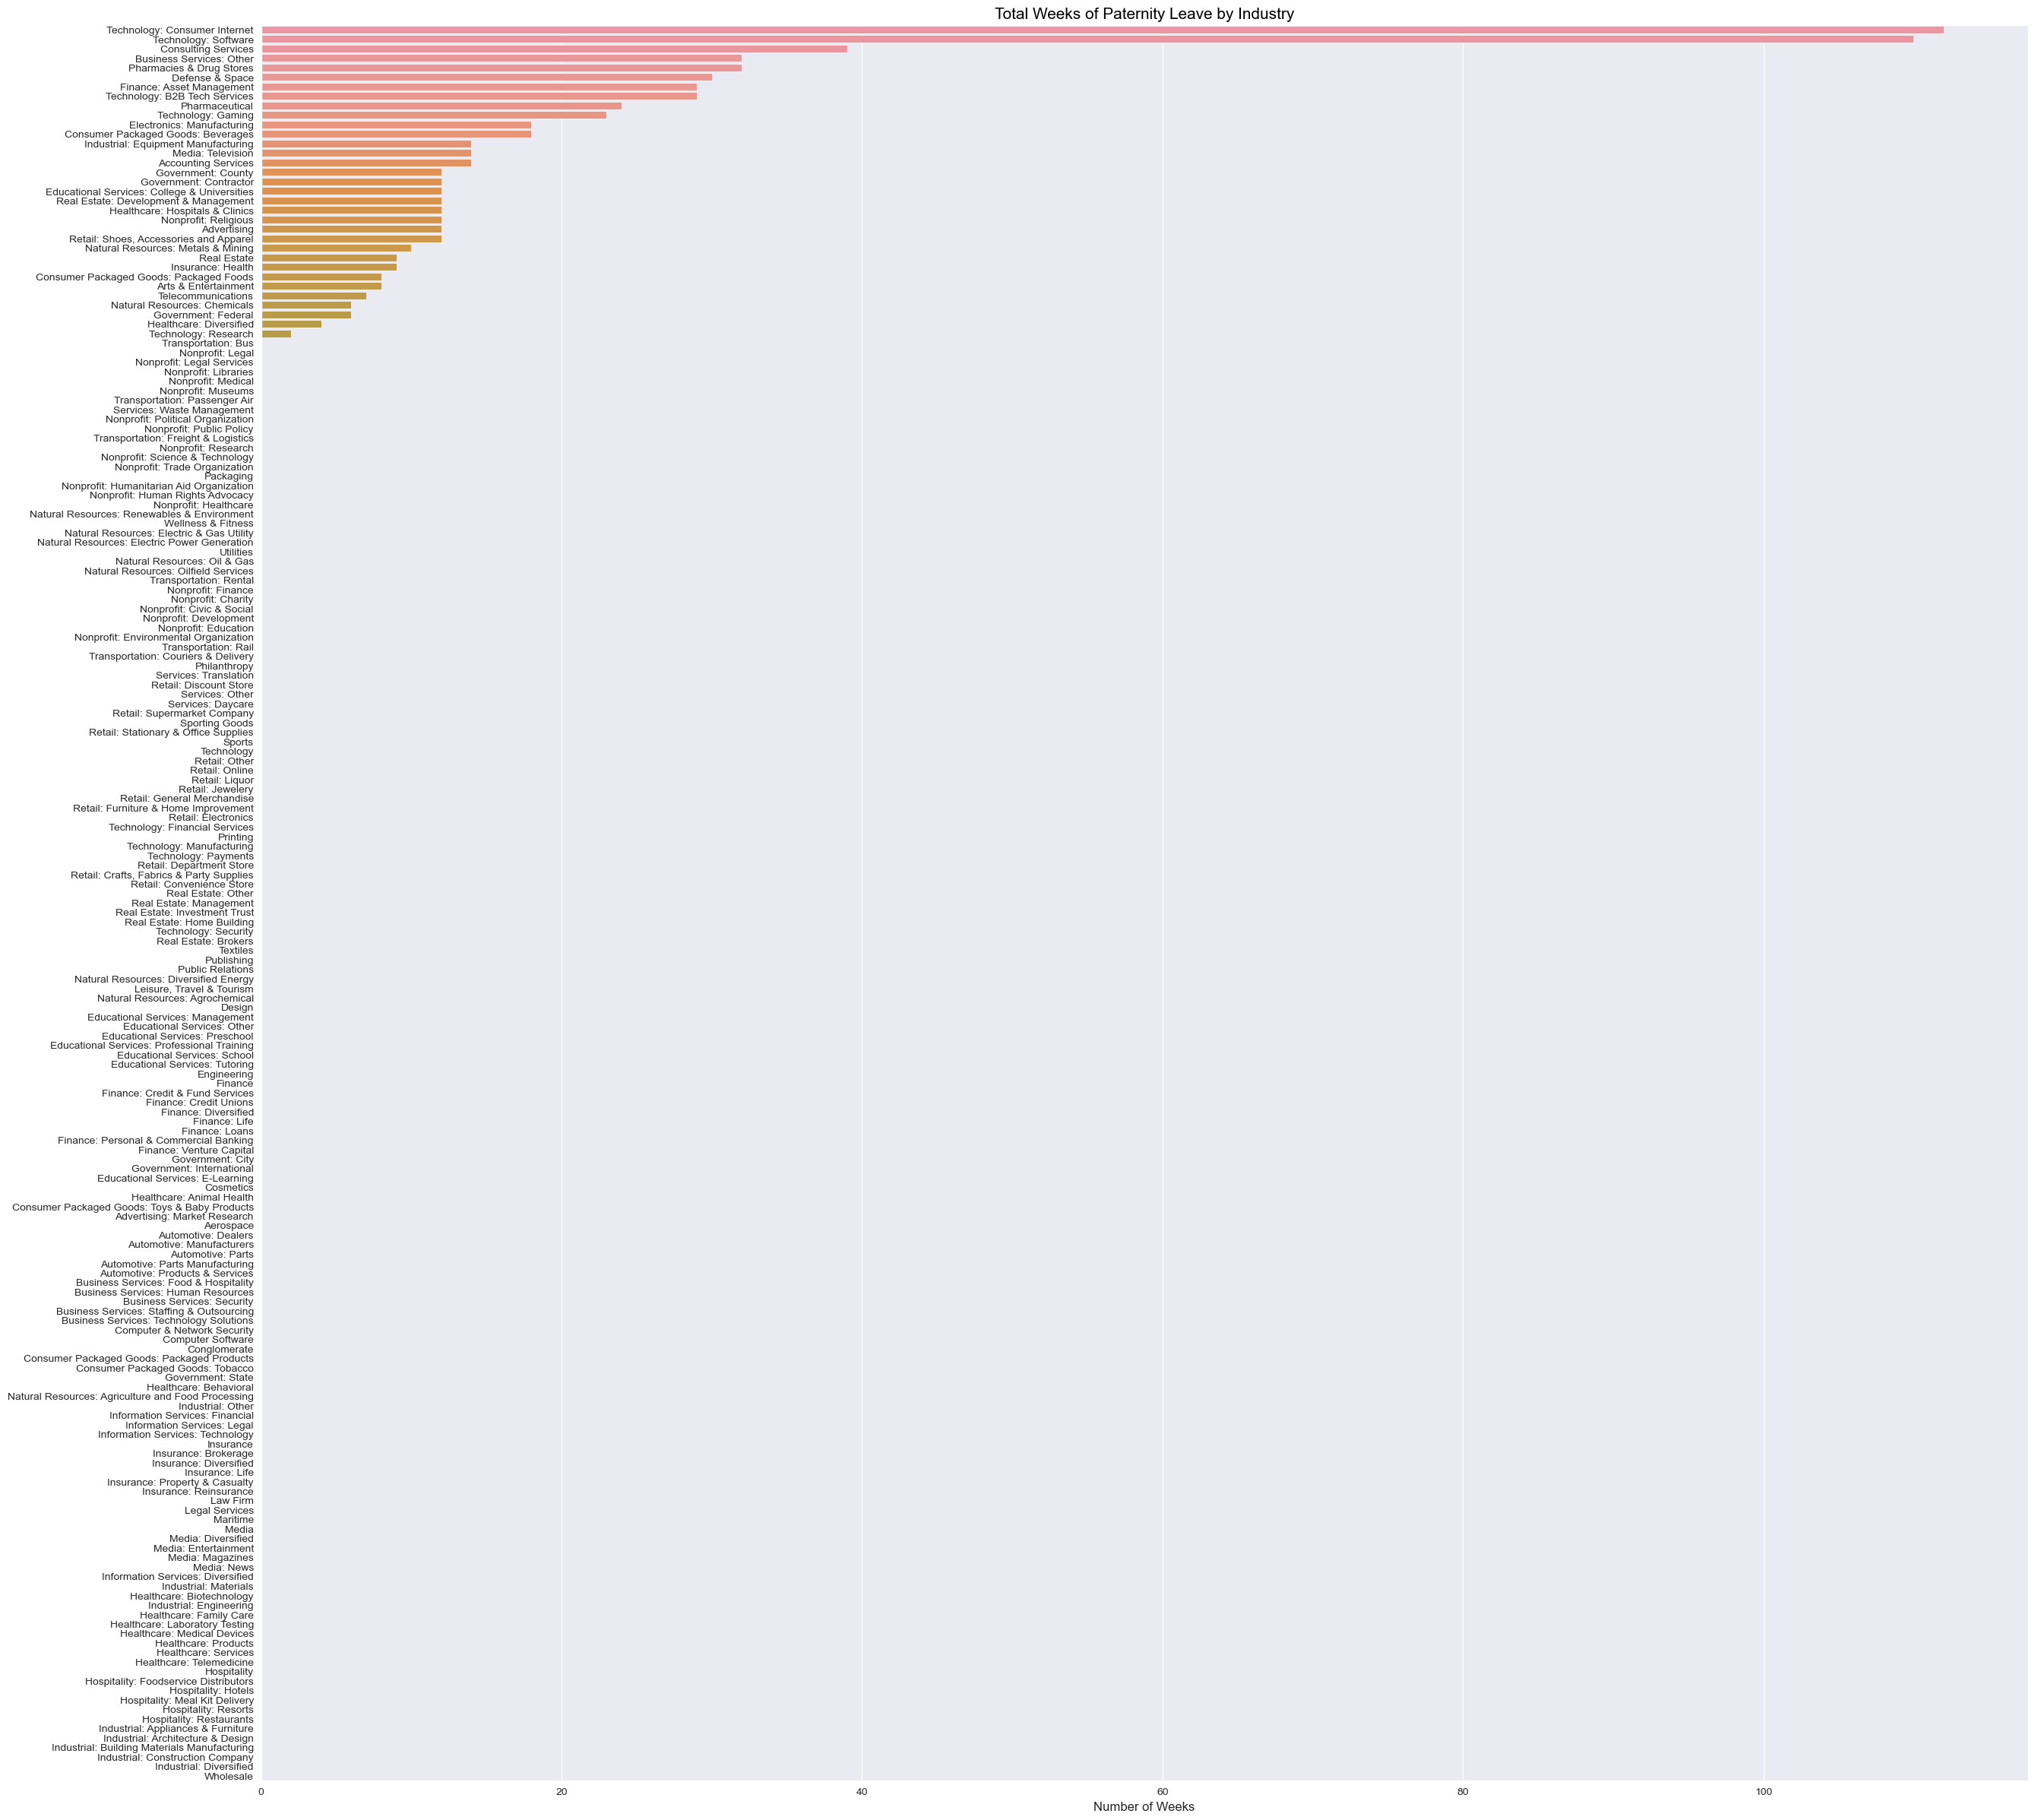

In [37]:
plt.figure(figsize=(30, 30))
sns.barplot(data=total_paternity_leave_by_industry[:50], 
            x=total_paternity_leave_by_industry["Total Paternity Leave"],
            y=total_paternity_leave_by_industry["Industry"])
plt.title("Total Weeks of Paternity Leave by Industry",
          color="black",
          fontsize=15)
plt.ylabel("")
plt.xlabel("Number of Weeks") 
print("The 'Technology: Consumer Internet' industry offers the most total weeks of paternity leave, followed closely by the 'Technology: Software' industry.")